<a href="https://colab.research.google.com/github/archangel2006/Machine-Learning-Models/blob/main/Heart%20Disease%20Prediction%20(LogisticRegression%2C%20DecisionTree%2C%20RandomForest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction Mdel

- Logistic
- Decision Tree
- Random Forest


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/heart_cleveland_upload.csv')

In [5]:
df.shape

(297, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [10]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['condition'].value_counts()

,count
condition,
0,160
1,137


- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
- condition: 0 = no disease, 1 = disease

# EXPLORATORY DATA ANALYSIS

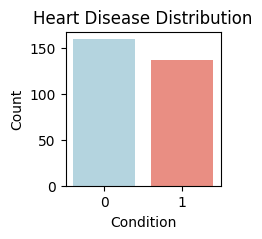

In [13]:
plt.figure(figsize=(2,2))
sns.countplot(x='condition', data=df, hue='condition', palette=['lightblue', 'salmon'], legend = False)
plt.title("Heart Disease Distribution")
plt.ylabel('Count')
plt.xlabel('Condition')
plt.show()

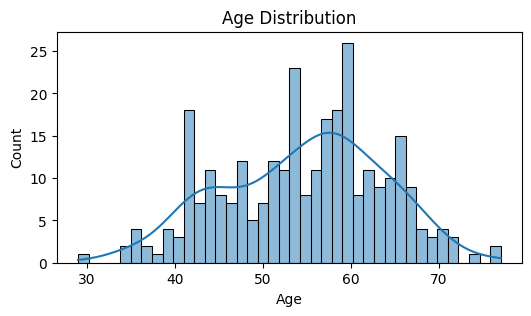

In [14]:
plt.figure(figsize=(6,3))
sns.histplot(x='age', data=df, bins=40, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

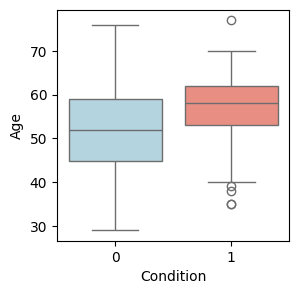

In [15]:
plt.figure(figsize=(3,3))

sns.boxplot(x='condition', y='age', data=df, hue='condition', palette=['lightblue', 'salmon'], legend = False)
plt.xlabel("Condition")
plt.ylabel("Age")
plt.show()

In [16]:
corr = df.corr(numeric_only=True)
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


[]

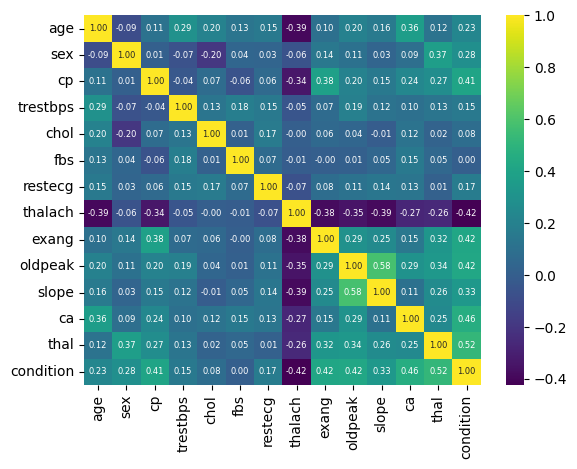

In [17]:
#plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size": 6}, cmap='viridis')
plt.plot()

In [18]:
x = df.drop('condition', axis=1)
y = df['condition']

# SPLITTING Train-Test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)


In [21]:
print(x_train_raw.shape)
print(y_train.shape)
print(x_test_raw.shape)
print(y_test.shape)

(237, 13)
(237,)
(60, 13)
(60,)


# SCALING

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train_raw)
x_test = scaler.transform(x_test_raw)

In [24]:
x_train

array([[ 0.78837327, -1.49885801, -0.13898338, ...,  0.62087132,
         0.29754097,  1.20019645],
       [-0.22463889,  0.6671746 , -0.13898338, ..., -0.94451701,
         2.34151803, -0.89904015],
       [-0.56230961, -1.49885801, -0.13898338, ...,  0.62087132,
        -0.72444757, -0.89904015],
       ...,
       [-1.46276486,  0.6671746 ,  0.89036231, ...,  0.62087132,
        -0.72444757,  0.15057815],
       [ 0.33814564,  0.6671746 ,  0.89036231, ...,  0.62087132,
         1.3195295 ,  1.20019645],
       [-0.56230961,  0.6671746 ,  0.89036231, ...,  0.62087132,
        -0.72444757,  1.20019645]])

# TRAIN BASE MODELS

In [25]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [26]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# EVALUATE MODELS

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
models = {"Logistic Regression" : lr,
          "Decision Tree" : dt,
          "Random Forest" : rf}

for name, model in models.items():
  y_pred = model.predict(x_test)
  print(f"📌 {name} Accuracy: {accuracy_score(y_test, y_pred):.3f}")
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print("-" * 50)

📌 Logistic Regression Accuracy: 0.917
[[32  0]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60

--------------------------------------------------
📌 Decision Tree Accuracy: 0.783
[[27  5]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.80      0.71      0.75        28

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

--------------------------------------------------
📌 Random Forest Accuracy: 0.883
[[31  1]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.84      0

# HYPERPARAMETER TUNING

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'n_estimators' : [100,200],
    'max_depth' : [4,6,8,None],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

In [32]:
# GridSearchCV : To find best parameters for the model

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print(f"Best Params: {grid_search.best_params_}")

Best Params: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=4,
                            min_samples_leaf=2,min_samples_split=10, random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.95      0.75      0.84        28

    accuracy                           0.87        60
   macro avg       0.89      0.86      0.86        60
weighted avg       0.88      0.87      0.86        60



In [35]:
print(accuracy_score(y_test, y_pred))

0.8666666666666667


In [36]:
print("Training Accuracy:", rf.score(x_train, y_train))
print("Test Accuracy:", rf.score(x_test, y_test))


Training Accuracy: 0.8860759493670886
Test Accuracy: 0.8666666666666667


# BOOSTING (Gradient Boosting)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gb = GradientBoostingClassifier(random_state=42)

gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [39]:
y_pred_gb = gb.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb)}" )

Gradient Boosting Accuracy: 0.8666666666666667


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.95      0.75      0.84        28

    accuracy                           0.87        60
   macro avg       0.89      0.86      0.86        60
weighted avg       0.88      0.87      0.86        60



# VOTING CLASSIFIER

In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

voting = VotingClassifier(estimators=[
    ('lr', lr),
    ('rf', rf),
    ('dt', dt)
], voting='hard')  # or 'soft' if you want probability-based voting

voting.fit(x_train, y_train)
y_pred = voting.predict(x_test)

from sklearn.metrics import accuracy_score
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))


Voting Classifier Accuracy: 0.8666666666666667
